# **Latihan Data Preparation**

Pada latihan kali ini, kita akan menggunakan beberapa metode yang telah kita pelajari:

- Imputing missing value
- Encoding
- Scaling
- Regularization
<br><br>

### **Gunakan melb_data.csv (Melbourne House Data) dengan:**
- Features: 'Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname'
- Target: 'Price'

### **Yang dilakukan pada preprocessing dan modeling:**
- Lakukan EDA secara sederhana untuk eksplorasi dataset.
- Splitting dataset dengan proporsi 80:20 dan random_state = 2020
- Gunakan ColumnTransformer untuk imputasi missing value dan encoding.
    - Ada 4 features yang mengandung missing value. Isi missing value tersebut dengan imputer yang menurut kamu paling sesuai dengan karakter masing-masing feature.
    - Ada 5 features categorical. Lakukan encoding pada features tersebut sesuai dengan karakter masing-masing feature.
- Lakukan Scaling pada numerical features. Pilih scaler yang menurut kamu paling sesuai berdasarkan karakteristik datanya.
- Lakukan prediksi dengan metode Lasso pada data preprocessed.


## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Load & Explore Dataset**

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df = df[['Suburb','Rooms','Type','Method','Distance','Bedroom2','Bathroom','Car','Landsize',
            'BuildingArea','YearBuilt','CouncilArea','Regionname','Price']]

In [ ]:
df.shape

(13580, 14)

In [ ]:
df.describe()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Price
count,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,1.358000e+04
mean,2.937997,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,1.075684e+06
std,0.955748,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,6.393107e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,8.500000e+04
25%,2.000000,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,6.500000e+05
50%,3.000000,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,9.030000e+05
75%,3.000000,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,1.330000e+06
max,10.000000,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,9.000000e+06


In [ ]:
df.describe(include='object')

,Suburb,Type,Method,CouncilArea,Regionname
count,13580,13580,13580,12211,13580
unique,314,3,5,33,8
top,Reservoir,h,S,Moreland,Southern Metropolitan
freq,359,9449,9022,1163,4695


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        13580 non-null  object 
 1   Rooms         13580 non-null  int64  
 2   Type          13580 non-null  object 
 3   Method        13580 non-null  object 
 4   Distance      13580 non-null  float64
 5   Bedroom2      13580 non-null  float64
 6   Bathroom      13580 non-null  float64
 7   Car           13518 non-null  float64
 8   Landsize      13580 non-null  float64
 9   BuildingArea  7130 non-null   float64
 10  YearBuilt     8205 non-null   float64
 11  CouncilArea   12211 non-null  object 
 12  Regionname    13580 non-null  object 
 13  Price         13580 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
df.select_dtypes('object').head()

,Suburb,Type,Method,CouncilArea,Regionname
0,Abbotsford,h,S,Yarra,Northern Metropolitan
1,Abbotsford,h,S,Yarra,Northern Metropolitan
2,Abbotsford,h,SP,Yarra,Northern Metropolitan
3,Abbotsford,h,PI,Yarra,Northern Metropolitan
4,Abbotsford,h,VB,Yarra,Northern Metropolitan


### **Simple EDA**

In [ ]:
# categorical features
cat_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O') & (feature not in ['Suburb']))]
cat_features

['Type', 'Method', 'CouncilArea', 'Regionname']

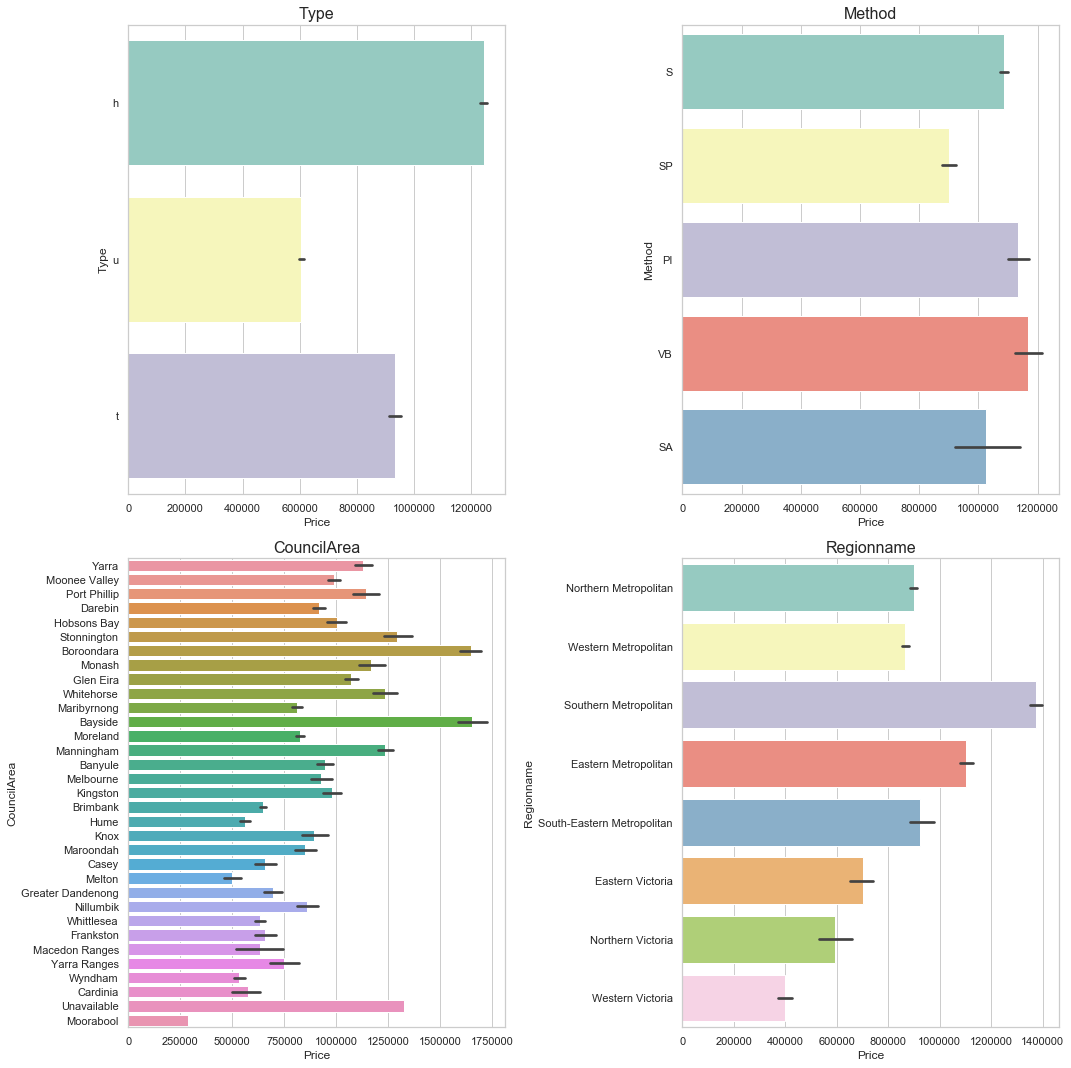

In [ ]:
# Harga rumah berdasarkan tiap categorical feature

plt.figure(figsize=(15, 15), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in cat_features:
    # subplot (letak grafik)
    ax = plt.subplot(2, 2, plotnumber)

    # Harga rumah berdasarkan feature
    sns.barplot(x = 'Price', y = feature, data = df)

    plt.xlabel('Price')
    plt.ylabel(feature)
    plt.title(feature, fontsize=16)
    plt.tight_layout();

    plotnumber += 1

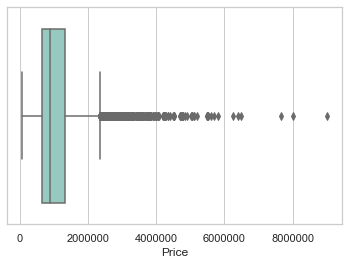

In [ ]:
# Distribusi Harga Rumah
sns.boxplot(x='Price', data=df);

In [ ]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

['Rooms',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Price']

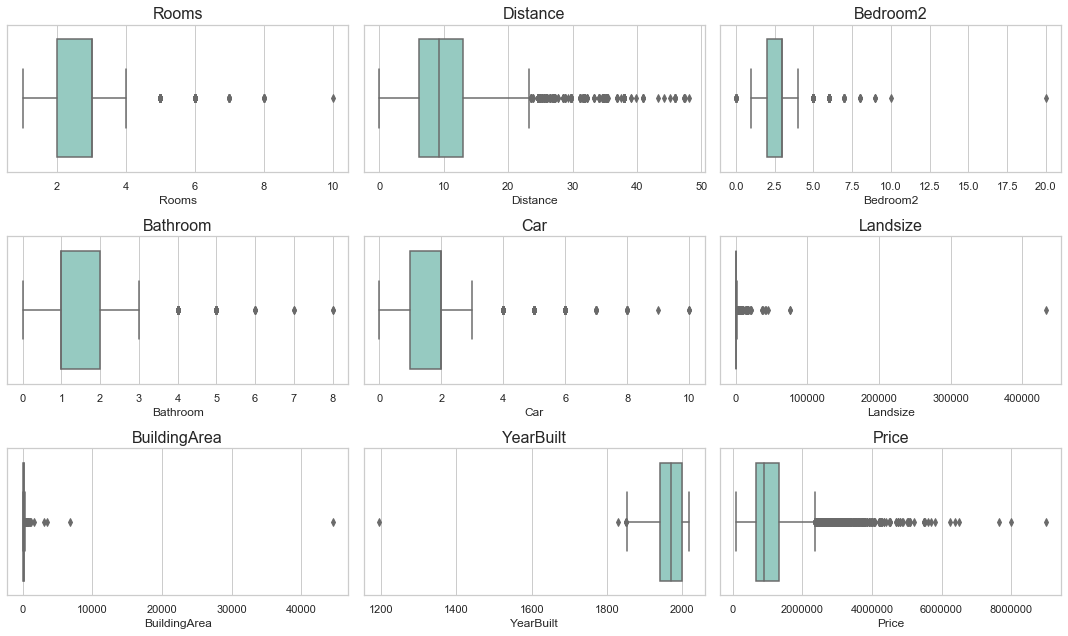

In [ ]:
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1


In [ ]:
# Outliers
outliers = df[(df['Bedroom2'] > 10) | (df['Landsize'] > 100000) | (df['BuildingArea'] > 10000) | (df['YearBuilt'] < 1800) ]
outliers

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Price
7404,Caulfield East,3,h,PI,9.3,20.0,1.0,2.0,875.0,NaN,NaN,Glen Eira,Southern Metropolitan,1650000.0
9968,Mount Waverley,3,h,VB,14.2,3.0,1.0,4.0,807.0,117.0,1196.0,Monash,Eastern Metropolitan,1200000.0
11020,Fitzroy,3,h,VB,2.1,3.0,3.0,1.0,433014.0,NaN,NaN,Yarra,Northern Metropolitan,2700000.0
13245,New Gisborne,5,h,S,48.1,5.0,3.0,5.0,44500.0,44515.0,NaN,NaN,Northern Victoria,1355000.0


In [ ]:
# df = df.drop(outliers.index, axis=0)

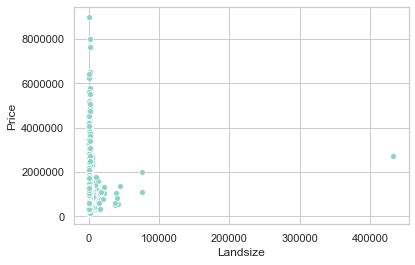

In [ ]:
# Price vs Landsize
sns.scatterplot(x='Landsize', y='Price', data=df);

In [ ]:
# Outlier pada Landsize
df[df['Landsize'] > 400000]

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Price
11020,Fitzroy,3,h,VB,2.1,3.0,3.0,1.0,433014.0,NaN,NaN,Yarra,Northern Metropolitan,2700000.0


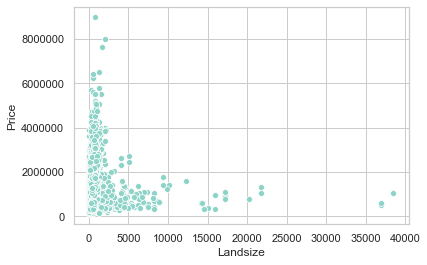

In [ ]:
sns.scatterplot(x='Landsize', y='Price', data=df[df['Landsize'] < 40000]);

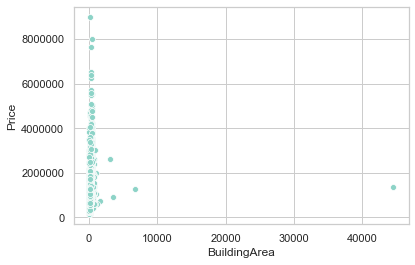

In [ ]:
# Building Area vs Price
sns.scatterplot(x='BuildingArea', y='Price', data=df);

In [ ]:
# Outlier
df[df['BuildingArea'] > 40000]

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Price
13245,New Gisborne,5,h,S,48.1,5.0,3.0,5.0,44500.0,44515.0,NaN,NaN,Northern Victoria,1355000.0


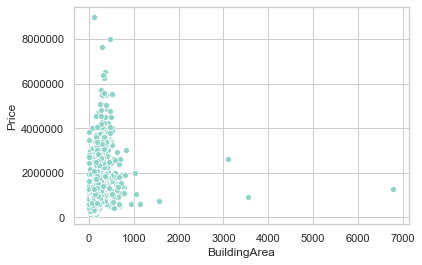

In [ ]:
sns.scatterplot(x='BuildingArea', y='Price', data=df[df['BuildingArea'] < 40000]);

In [ ]:
df.isna().sum()

Suburb             0
Rooms              0
Type               0
Method             0
Distance           0
Bedroom2           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
Regionname         0
Price              0
dtype: int64

In [ ]:
# Check correlation to the target
df.corr()['Price']

Rooms           0.496634
Distance       -0.162522
Bedroom2        0.475951
Bathroom        0.467038
Car             0.238979
Landsize        0.037507
BuildingArea    0.090981
YearBuilt      -0.323617
Price           1.000000
Name: Price, dtype: float64

## **Data Pre-processing**

### Isi missing value pada feature: 'Car','BuildingArea','YearBuilt','CouncilArea'
- SimpleImputer: most_frequent untuk 'CouncilArea'
- Iterative imputer: 'Car','BuildingArea','YearBuilt'

### Encoding:
- Binary Encoding : 'Suburb', 'CouncilArea', 'Regionname'
- Onehot Encoding : 'Type', 'Method'

### Scaling:
- RobustScaler() karena terdapat banyak outliers

In [ ]:
# Import Libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer # untuk transformers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce # untuk ordinal dan binary encoder
from sklearn.preprocessing import RobustScaler

## **Data Splitting**

In [ ]:
# Define X and y
X = df.drop(columns='Price')
y = df['Price']

In [ ]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2020
)

## **Data Transform**

### Isi missing value pada feature: 'Car','BuildingArea','YearBuilt','CouncilArea'
- SimpleImputer: most_frequent untuk 'CouncilArea'
- Iterative imputer: 'Car','BuildingArea','YearBuilt'

### Encoding:
- Binary Encoding : 'Suburb', 'CouncilArea', 'Regionname'
- Onehot Encoding : 'Type', 'Method'

### Scaling:
- RobustScaler() karena terdapat banyak outliers

In [ ]:
# Binary & Simple imputer (mode)
binary_simple = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary', ce.BinaryEncoder())
])

# Encoding
transformer = ColumnTransformer([
    ('imputer', IterativeImputer(), ['Car','BuildingArea','YearBuilt']),
    ('onehot', OneHotEncoder(drop='first'), ['Type','Method']),
    ('binary', ce.BinaryEncoder(), ['Suburb','Regionname']),
    ('binary_simple', binary_simple, ['CouncilArea'])
], remainder='passthrough')

In [ ]:
X_train.head()

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
12761,Kew,3,h,S,5.4,3.0,2.0,2.0,460.0,NaN,2000.0,NaN,Southern Metropolitan
5272,Richmond,5,h,SP,2.6,5.0,3.0,3.0,618.0,260.0,1890.0,Yarra,Northern Metropolitan
4772,Port Melbourne,2,u,S,3.8,1.0,1.0,1.0,0.0,70.0,2005.0,Port Phillip,Southern Metropolitan
4711,Port Melbourne,2,u,VB,3.8,2.0,2.0,1.0,0.0,NaN,NaN,Port Phillip,Southern Metropolitan
11201,Southbank,2,u,S,0.7,2.0,1.0,1.0,0.0,88.0,NaN,Melbourne,Southern Metropolitan


In [ ]:
# .fit and .transform method
X_train_preprocessed = transformer.fit_transform(X_train)

#.transform method
X_test_preprocessed = transformer.transform(X_test)

In [ ]:
X_train_preprocessed

array([[ 2.00000000e+00, -9.71746334e+01,  2.00000000e+03, ...,
         3.00000000e+00,  2.00000000e+00,  4.60000000e+02],
       [ 3.00000000e+00,  2.60000000e+02,  1.89000000e+03, ...,
         5.00000000e+00,  3.00000000e+00,  6.18000000e+02],
       [ 1.00000000e+00,  7.00000000e+01,  2.00500000e+03, ...,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.00000000e+00,  2.27000000e+02,  1.96000000e+03, ...,
         4.00000000e+00,  3.00000000e+00,  6.36000000e+02],
       [ 1.00000000e+00,  1.01000000e+02,  2.00700000e+03, ...,
         2.00000000e+00,  2.00000000e+00,  1.17000000e+02],
       [ 1.00000000e+00,  5.69205339e+01,  1.97000000e+03, ...,
         2.00000000e+00,  1.00000000e+00,  1.34000000e+02]])

## **Scaling**

In [ ]:
# Scaling
scaler = RobustScaler()

X_train_preprocessed_scaled = scaler.fit_transform(X_train_preprocessed)
X_test_preprocessed_scaled = scaler.transform(X_test_preprocessed)

In [ ]:
X_train_preprocessed_scaled

array([[ 0.        , -3.16375433,  2.35706409, ...,  0.        ,
         1.        ,  0.02959831],
       [ 1.        ,  1.81044889, -4.97626924, ...,  2.        ,
         2.        ,  0.36363636],
       [-1.        , -0.83559179,  2.69039742, ..., -2.        ,
         0.        , -0.94291755],
       ...,
       [ 0.        ,  1.3508734 , -0.30960258, ...,  1.        ,
         2.        ,  0.40169133],
       [-1.        , -0.40386937,  2.82373076, ..., -1.        ,
         1.        , -0.69556025],
       [-1.        , -1.01774337,  0.35706409, ..., -1.        ,
         0.        , -0.65961945]])

## **Find the best alpha**


In [ ]:
# Import Libraries
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [ ]:
# Lasso

alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0000001]
training_rmse = []
testing_rmse = []
score = 0

for i in range(len(alpha)):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train_preprocessed_scaled, y_train)

    y_predict_train = lasso.predict(X_train_preprocessed_scaled)
    rmse_train = mean_squared_error(y_train, y_predict_train)**0.5
    training_rmse.append(rmse_train)

    y_predict_test = lasso.predict(X_test_preprocessed_scaled)
    rmse_score = mean_squared_error(y_test, y_predict_test)**0.5
    testing_rmse.append(rmse_score)

    if i==0:
        score = rmse_score
        best_alpha = alpha[i]

    if score > rmse_score:
        score = rmse_score
        best_alpha = alpha[i]

In [ ]:
print('Best alpha', best_alpha)
print('RMSE', score)

print('Training RMSE:', training_rmse)
print('Testing RMSE:', testing_rmse)


Best alpha 1e-07
RMSE 417538.3202514401
Training RMSE: [534474.0035984509, 414799.00677691866, 405865.56986006635, 405129.5878519098, 405098.6551212763, 405098.34579538484, 405098.3427022167, 405098.3426712857, 405098.3426709764, 405098.3426709732]
Testing RMSE: [547588.0422426002, 426855.9922854434, 420519.24386233743, 417703.47339413734, 417550.19388421124, 417539.46105261374, 417538.4338568128, 417538.3316065128, 417538.3213867503, 417538.3202514401]


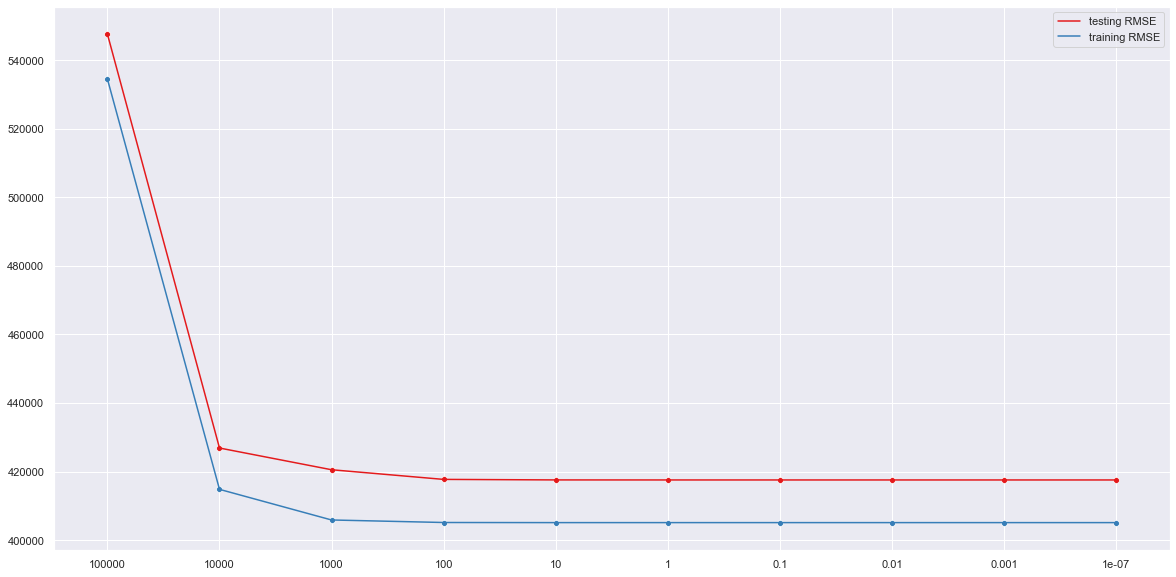

In [ ]:
# Plot the alphas
sns.set(palette='Set1')
length = range(len(alpha))

plt.figure(figsize = (20,10))

sns.lineplot(length, testing_rmse)
sns.scatterplot(length, testing_rmse)

sns.lineplot(length,training_rmse)
sns.scatterplot(length, training_rmse)

plt.legend(['testing RMSE', 'training RMSE'])
plt.xticks(length, alpha);

In [ ]:
pd.DataFrame(
    {
    'alpha': alpha,
    'train RMSE': training_rmse,
    'test RMSE': testing_rmse
    }
)

,alpha,train RMSE,test RMSE
0,1.000000e+05,534474.003598,547588.042243
1,1.000000e+04,414799.006777,426855.992285
2,1.000000e+03,405865.569860,420519.243862
3,1.000000e+02,405129.587852,417703.473394
4,1.000000e+01,405098.655121,417550.193884
5,1.000000e+00,405098.345795,417539.461053
6,1.000000e-01,405098.342702,417538.433857
7,1.000000e-02,405098.342671,417538.331607
8,1.000000e-03,405098.342671,417538.321387
9,1.000000e-07,405098.342671,417538.320251


### **Interpretasi**

Dari alpha 1 sampai 0.00001, nilai RMSE untuk train dan test set sudah tidak terlalu berubah signifikan. Jadi, untuk kasus kali ini digunakan alpha = 0.1 saja.

## **Modeling**

In [ ]:
# Model
model = Lasso(alpha=0.1)

# Model training
model.fit(X_train_preprocessed_scaled, y_train)

# Model predicting test set
y_pred = model.predict(X_test_preprocessed_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE:', mse)
print('RMSE:', rmse)

MSE: 174338343747.6
RMSE: 417538.4338568128


## **Modeling with Pipeline**

Melakukan tahap transform, scaling, dan modeling dalam 1 tahap.

In [ ]:
# Model Lasso regression
lasso = Lasso(alpha=0.1)

# Coba model dengan scaling
model = Pipeline([
    ('transformer', transformer),   # transform features
    ('scaling', RobustScaler()),    # scale features
    ('model', lasso)                # modeling
])

# Fit
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE', mse)
print('RMSE', rmse)

MSE 174339201536.10715
RMSE 417539.46105261374


### **Actual & prediction value comparison**

In [ ]:
y_test = y_test.astype('int')
y_pred = y_pred.astype('int')


In [ ]:
y_comparison = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
y_comparison

,y_test,y_pred
5385,604000,648410
1003,1170000,1258908
6364,2820000,1834142
1199,880000,1105070
11593,1640000,1388009
...,...,...
9420,1926000,1828061
1888,3010000,2023451
13148,1000000,1448267
2129,1125000,1136921


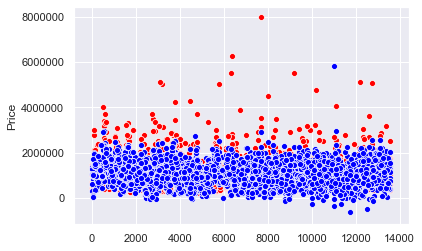

In [ ]:
sns.scatterplot(x=y_comparison.index, y=y_test, data = y_comparison, color='r')
sns.scatterplot(x=y_comparison.index, y=y_pred, data = y_comparison, color='b')


### **Interpretasi**

- Pemodelan Lasso regression dengan menggunakan dan tanpa pipeline menghasilkan nilai RMSE yang sama, yaitu 417539.46.
- Untuk ke depannya, pemodelan lebih baik dilakukan dengan menggunakan pipeline untuk menghindari terjadinya information leakage (data test ikut dipelajari oleh model).